In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv("cleaned_data.csv")

In [141]:

df.head()

,role,seniority,avg_salary,state,company_rating,company_size,sector,company_age
0,data scientist,2,72.0,NM,3.8,medium,Aerospace & Defense,47.0
1,data scientist,2,87.5,MD,3.4,large,Health Care,36.0
2,data scientist,2,85.0,FL,4.8,medium,Business Services,10.0
3,data scientist,2,76.5,WA,3.8,medium,"Oil, Gas, Energy & Utilities",55.0
4,data scientist,2,114.5,NY,2.9,small,Business Services,22.0


In [142]:
df = df.replace(to_replace = -1, value = np.nan)
df.isnull().sum()

role               0
seniority          0
avg_salary         0
state              0
company_rating    11
company_size      10
sector             0
company_age        0
dtype: int64

In [143]:
mean_rating = df['company_rating'].mean()
df['company_rating'] = df['company_rating'].replace(to_replace = np.nan, value = mean_rating)
mode_size = df['company_size'].mode()
df['company_size'] = df['company_size'].replace(to_replace = np.nan, value = mode_size)

(array([  6., 108., 184., 182., 121.,  85.,  39.,   9.,   3.,   5.]),
 array([ 15.5 ,  39.35,  63.2 ,  87.05, 110.9 , 134.75, 158.6 , 182.45,
        206.3 , 230.15, 254.  ]),
 <a list of 10 Patch objects>)

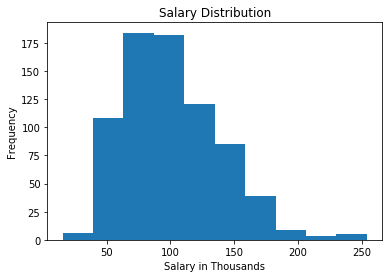

In [144]:
plt.xlabel('Salary in Thousands')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.hist(df['avg_salary'])

(array([ 10.,  11.,  33.,  60., 118., 167., 171.,  77.,  50.,  45.]),
 array([1.9 , 2.21, 2.52, 2.83, 3.14, 3.45, 3.76, 4.07, 4.38, 4.69, 5.  ]),
 <a list of 10 Patch objects>)

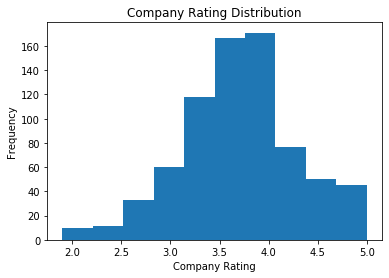

In [145]:
plt.xlabel('Company Rating')
plt.ylabel('Frequency')
plt.title('Company Rating Distribution')
plt.hist(df['company_rating'])

(array([352., 195.,  64.,  47.,   8.,  27.,  33.,   1.,  14.,   1.]),
 array([  1. ,  28.5,  56. ,  83.5, 111. , 138.5, 166. , 193.5, 221. ,
        248.5, 276. ]),
 <a list of 10 Patch objects>)

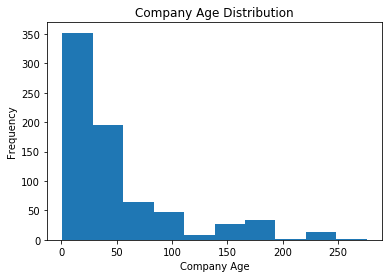

In [146]:
plt.xlabel('Company Age')
plt.ylabel('Frequency')
plt.title('Company Age Distribution')
plt.hist(df['company_age'])

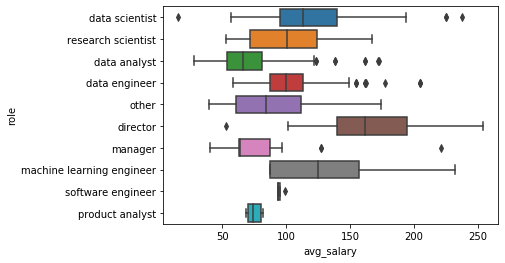

In [147]:
sns.boxplot(x = 'avg_salary', y='role', data = df)

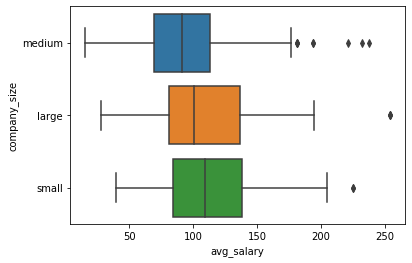

In [148]:
sns.boxplot(x = 'avg_salary', y='company_size', data = df)

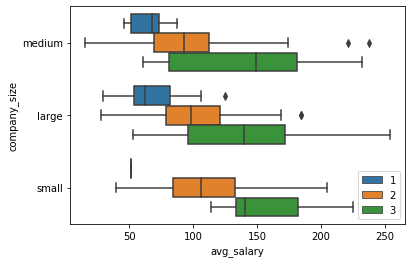

In [149]:

sns.boxplot(x = 'avg_salary', y='company_size', hue = 'seniority', data = df)
plt.legend(loc='lower right')

In [150]:
def map_company_size(value):
    if value == "small":
        return 1
    elif value == "large":
        return 2
    else:
        return 3
    
df['company_size'] = df['company_size'].apply(map_company_size)
df.head()

,role,seniority,avg_salary,state,company_rating,company_size,sector,company_age
0,data scientist,2,72.0,NM,3.8,3,Aerospace & Defense,47.0
1,data scientist,2,87.5,MD,3.4,2,Health Care,36.0
2,data scientist,2,85.0,FL,4.8,3,Business Services,10.0
3,data scientist,2,76.5,WA,3.8,3,"Oil, Gas, Energy & Utilities",55.0
4,data scientist,2,114.5,NY,2.9,1,Business Services,22.0


[Text(0.5, 0, 'seniority'),
 Text(1.5, 0, 'avg_salary'),
 Text(2.5, 0, 'company_rating'),
 Text(3.5, 0, 'company_size'),
 Text(4.5, 0, 'company_age')]

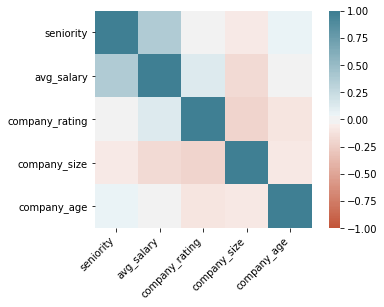

In [151]:
df_numeric = df[['seniority', 'avg_salary', 'company_rating', 'company_size', 'company_age']]
corr = df_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [152]:
corr

,seniority,avg_salary,company_rating,company_size,company_age
seniority,1.000000,0.370003,-0.005547,-0.071296,0.054351
avg_salary,0.370003,1.000000,0.131463,-0.157864,0.024522
company_rating,-0.005547,0.131463,1.000000,-0.203652,-0.102560
company_size,-0.071296,-0.157864,-0.203652,1.000000,-0.080759
company_age,0.054351,0.024522,-0.102560,-0.080759,1.000000


Larger companies and older companies seem to have lower company ratings (weak negative correlation). Seniority seems to have a moderate positive realtionship with salary as well which makes sense. Company rating seems to have a small positive correlation with salary as well, which would mean higher rated companies have a higher salary or vice versa. Rating also has a negative correlation with company size and age, so we can assume that older and larger companies have lower employee ratings.

In [153]:
#salary_by_role = pd.pivot_table(df, index = 'role', values = 'avg_salary')
#salary_by_role
salary_by_role = df.groupby(['role'])['avg_salary'].mean()

Text(0.5, 1.0, 'Salary by Role')

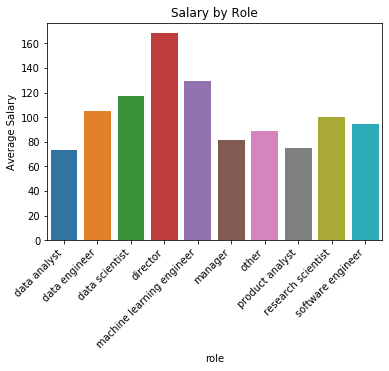

In [154]:
ax = sns.barplot(x = salary_by_role.index, y = salary_by_role.values)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylabel('Average Salary')
ax.set_title('Salary by Role')

In [155]:
# Regions are based on the US census regions

# break the states into regions and group by role and region to see how the salary differs
northeast = ['ME', 'NY', 'PA', 'VT', 'NH', 'CT', 'MA', 'RI', 'NJ']
# check DC
south = ['MD', 'DE', 'VA', 'WV', 'NC', 'KY', 'SC', 'TN', 'GA', 'AL', 'MS', 'FL', 'AR', 'LA', 'OK', 'TX']
midwest = ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'IL', 'IN', 'OH', 'MI']
west = ['WA', 'ID', 'MT', 'WY', 'CO', 'UT', 'NM', 'AZ', 'NV', 'CA', 'OR']

len(south) + len(northeast) +len(midwest) + len(west)

48

In [156]:
def find_region(state_abbrev):
    if state_abbrev in northeast:
        return 'Northeast'
    elif state_abbrev in south:
        return 'South'
    elif state_abbrev in midwest:
        return 'Midwest'
    elif state_abbrev in west:
        return 'West'
    
df['region'] = df['state'].apply(find_region)
region_freq = df.region.value_counts()


Text(0.5, 1.0, 'Breakdown of US Region Jobs')

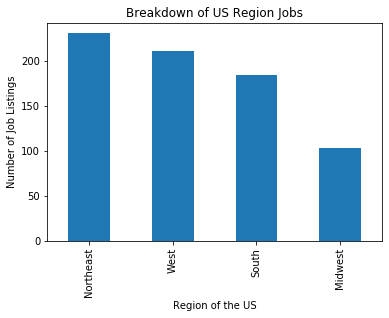

In [157]:
ax = region_freq.plot(kind='bar')
ax.set_ylabel('Number of Job Listings')
ax.set_xlabel('Region of the US')
ax.set_title('Breakdown of US Region Jobs')

In [158]:
df.groupby(['role', 'region'])['avg_salary'].mean()

role                       region   
data analyst               Midwest       59.722222
                           Northeast     79.481132
                           South         66.850000
                           West          75.575000
data engineer              Midwest      101.906250
                           Northeast    102.552632
                           South        100.395349
                           West         116.405405
data scientist             Midwest      112.191176
                           Northeast    113.390244
                           South        103.666667
                           West         130.056701
director                   Midwest      221.750000
                           Northeast    122.571429
machine learning engineer  Midwest      105.400000
                           Northeast    125.000000
                           South         87.000000
                           West         164.500000
manager                    Midwest       71.8

In [159]:
salary_by_region = df.groupby(['region'])['avg_salary'].mean().reset_index()
salary_by_region

,region,avg_salary
0,Midwest,96.466019
1,Northeast,101.755411
2,South,89.472973
3,West,113.687204


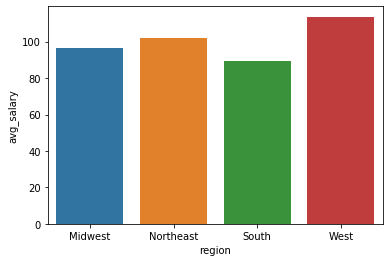

In [160]:
sns.barplot(x = 'region', y= 'avg_salary', data = salary_by_region)
